In [24]:
!pip install networkx
!pip install numpy
!pip install pandas
!pip install scipy
!pip install --config-settings="--global-option=build_ext" --config-settings="--global-option=-I$(brew --prefix graphviz)/include/" --config-settings="--global-option=-L$(brew --prefix graphviz)/lib/" pygraphviz


In [25]:
import os

import networkx as nx
import numpy as np
import pandas as pd
from IPython.core.display import Image
from networkx.drawing.nx_agraph import to_agraph

basepath = os.path.join('..', 'images')
if not os.path.exists(basepath):
    os.makedirs(os.path.join(basepath), exist_ok=True)

# Aufgabe 06 - Page-Rank

Bestimmen Sie die Matrizen $\widetilde{A}$, $\widetilde{A}$ und $M$ für den Dämpfungsfaktor $d = 0.75$ und stellen Sie diese dar.
Berechnen Sie den PageRank, geben Sie den Vektor $R$ nach den ersten $3$ Iterationen aus dem Potenzverfahren an (Initialwert $R_0$, $R_1$, $R_2$, $R_3$) wobei die Zahl im Index für die Iteration steht.
Was bedeutet der PageRank?

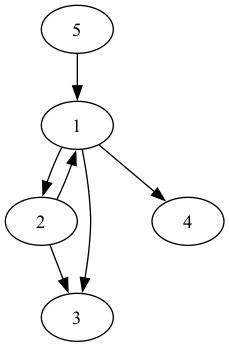

In [26]:
G = nx.DiGraph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(2, 1)
G.add_edge(2, 3)
G.add_edge(5, 1)

g = to_agraph(G)
g.layout(prog='dot')

graph_file = os.path.join(basepath, f'a06a_graph.png')
g.draw(graph_file, prog='dot', format='png')

display(Image(graph_file))

In [27]:
def create_transition_matrix(G, d=0.75):
    N = len(G.nodes)
    A = nx.adjacency_matrix(G, nodelist=sorted(G.nodes)).todense()
    A = np.array(A, dtype=float)
    out_degree = np.sum(A, axis=1)

    # Avoid division by zero by setting 1 where out_degree is 0
    out_degree[out_degree == 0] = 1
    M = A / out_degree

    # Calculate the Google matrix with damping factor
    G_matrix = d * M + (1 - d) / N * np.ones((N, N))

    return G_matrix, M

def pagerank(G, d=0.75, iterations=3):
    N = len(G.nodes)
    G_matrix, M = create_transition_matrix(G, d)

    # Initial vector R_0
    R = np.ones(N) / N

    R_list = [R]
    for _ in range(iterations):
        R = np.dot(G_matrix, R)
        R_list.append(R)

    return R_list, G_matrix, M

R_list, G_matrix, M = pagerank(G)

# Display the results
for i, R in enumerate(R_list):
    print(f"R_{i} = {R}")

print("\nGoogle Matrix G (with damping factor d=0.75):\n", G_matrix)
print("\nTransition Matrix M:\n", M)


R_0 = [0.2 0.2 0.2 0.2 0.2]
R_1 = [0.425 0.25  0.05  0.05  0.1  ]
R_2 = [0.2125  0.1875  0.04375 0.04375 0.15   ]
R_3 = [0.1678125 0.1178125 0.031875  0.031875  0.085    ]

Google Matrix G (with damping factor d=0.75):
 [[0.05  0.425 0.8   0.8   0.05 ]
 [0.3   0.05  0.8   0.05  0.05 ]
 [0.05  0.05  0.05  0.05  0.05 ]
 [0.05  0.05  0.05  0.05  0.05 ]
 [0.3   0.05  0.05  0.05  0.05 ]]

Transition Matrix M:
 [[0.         0.5        1.         1.         0.        ]
 [0.33333333 0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.        ]]


In [28]:
print('Transition Matrix M')
display(pd.DataFrame(M))

Transition Matrix M


,0,1,2,3,4
0,0.000000,0.5,1.0,1.0,0.0
1,0.333333,0.0,1.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0
4,0.333333,0.0,0.0,0.0,0.0


In [29]:
print('Google Matrix G')
display(pd.DataFrame(G_matrix))

Google Matrix G


,0,1,2,3,4
0,0.05,0.425,0.80,0.80,0.05
1,0.30,0.050,0.80,0.05,0.05
2,0.05,0.050,0.05,0.05,0.05
3,0.05,0.050,0.05,0.05,0.05
4,0.30,0.050,0.05,0.05,0.05


In [30]:
print('PageRank Vectors')
display(pd.DataFrame(R_list))

PageRank Vectors


,0,1,2,3,4
0,0.200000,0.200000,0.200000,0.200000,0.200
1,0.425000,0.250000,0.050000,0.050000,0.100
2,0.212500,0.187500,0.043750,0.043750,0.150
3,0.167813,0.117813,0.031875,0.031875,0.085
